# Rural vs Urban Adoption Analysis
## Analyzing Pincode-based Enrollment to Understand Digital Divide

This notebook analyzes Aadhaar enrollment patterns across rural and urban areas using pincode-based classification.

**Datasets analyzed:**
1. `data/demographic.csv` - Demographic enrollment data
2. `data/biometric.csv` - Biometric authentication data
3. `data/enrollment.csv` - General enrollment data

## 1. Setup and Imports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data Files

Upload your CSV files to Colab or mount Google Drive and update the file paths below.

In [2]:
# For Google Drive (uncomment if using Drive)
# from google.colab import drive
# drive.mount('/content/drive')
# base_path = '/content/drive/MyDrive/uidai/'

# For local upload (uncomment if uploading files)
# from google.colab import files
# uploaded = files.upload()

# Set your data path here
base_path = ''  # Update this path

print("Ready to load data files...")

Ready to load data files...


In [3]:
# Load datasets
print("Loading datasets...")

# Load demographic data
df_demographic = pd.read_csv(base_path + 'data/demographic.csv')
print(f"✓ Demographic data loaded: {df_demographic.shape[0]:,} rows, {df_demographic.shape[1]} columns")

# Load biometric data
df_biometric = pd.read_csv(base_path + 'data/biometric.csv')
print(f"✓ Biometric data loaded: {df_biometric.shape[0]:,} rows, {df_biometric.shape[1]} columns")

# Load enrollment data
df_enrollment = pd.read_csv(base_path + 'data/enrollment.csv')
print(f"✓ Enrollment data loaded: {df_enrollment.shape[0]:,} rows, {df_enrollment.shape[1]} columns")

print("\n" + "="*60)
print("All datasets loaded successfully!")
print("="*60)

Loading datasets...
✓ Demographic data loaded: 2,071,687 rows, 6 columns
✓ Biometric data loaded: 1,048,575 rows, 6 columns
✓ Enrollment data loaded: 1,006,007 rows, 7 columns

All datasets loaded successfully!


## 3. Data Overview

In [4]:
# Display dataset information
print("=" * 80)
print("DEMOGRAPHIC DATA")
print("=" * 80)
print("\nColumns:", df_demographic.columns.tolist())
print("\nFirst 5 rows:")
display(df_demographic.head())
print("\nData Info:")
df_demographic.info()

DEMOGRAPHIC DATA

Columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

First 5 rows:


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,uttar pradesh,Gorakhpur,273213,49,529
1,01-03-2025,andhra pradesh,Chittoor,517132,22,375
2,01-03-2025,gujarat,Rajkot,360006,65,765
3,01-03-2025,andhra pradesh,Srikakulam,532484,24,314
4,01-03-2025,rajasthan,Udaipur,313801,45,785



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071687 entries, 0 to 2071686
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [5]:
print("=" * 80)
print("BIOMETRIC DATA")
print("=" * 80)
print("\nColumns:", df_biometric.columns.tolist())
print("\nFirst 5 rows:")
display(df_biometric.head())
print("\nData Info:")
df_biometric.info()

BIOMETRIC DATA

Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

First 5 rows:


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,andaman and nicobar islands,andamans,744101,16,193
1,01-04-2025,andaman and nicobar islands,andamans,744101,17,167
2,01-05-2025,andaman and nicobar islands,andamans,744106,10,30
3,01-05-2025,andaman and nicobar islands,andamans,744101,12,128
4,01-06-2025,andaman and nicobar islands,andamans,744101,11,129



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date          1048575 non-null  object
 1   state         1048575 non-null  object
 2   district      1048575 non-null  object
 3   pincode       1048575 non-null  int64 
 4   bio_age_5_17  1048575 non-null  int64 
 5   bio_age_17_   1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB


In [6]:
print("=" * 80)
print("ENROLLMENT DATA")
print("=" * 80)
print("\nColumns:", df_enrollment.columns.tolist())
print("\nFirst 5 rows:")
display(df_enrollment.head())
print("\nData Info:")
df_enrollment.info()

ENROLLMENT DATA

Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

First 5 rows:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,26-10-2025,andhra pradesh,Nalgonda,508004,0,1,0
1,26-10-2025,andhra pradesh,Nalgonda,508238,1,0,0
2,26-10-2025,andhra pradesh,Nalgonda,508278,1,0,0
3,26-10-2025,andhra pradesh,Nandyal,518432,0,1,0
4,26-10-2025,andhra pradesh,Nandyal,518543,1,0,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006007 entries, 0 to 1006006
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006007 non-null  object
 1   state           1006007 non-null  object
 2   district        1006007 non-null  object
 3   pincode         1006007 non-null  int64 
 4   age_0_5         1006007 non-null  int64 
 5   age_5_17        1006007 non-null  int64 
 6   age_18_greater  1006007 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


## 4. Define Urban Pincode Ranges

We'll classify pincodes based on major urban centers (metros and Tier-1 cities).

In [7]:
# Define urban pincode ranges for major cities in India
# Format: (start, end) tuples for each urban area

URBAN_PINCODE_RANGES = [
    # Delhi NCR
    (110001, 110097),  # Delhi
    (201001, 201318),  # Ghaziabad
    (121001, 122506),  # Faridabad, Gurgaon
    (201301, 201318),  # Noida
    
    # Mumbai Metropolitan Region
    (400001, 400104),  # Mumbai
    (401101, 401606),  # Thane, Navi Mumbai
    
    # Bangalore
    (560001, 560110),  # Bangalore
    
    # Kolkata
    (700001, 700159),  # Kolkata
    
    # Chennai
    (600001, 600132),  # Chennai
    
    # Hyderabad
    (500001, 500100),  # Hyderabad
    
    # Pune
    (411001, 411062),  # Pune
    
    # Ahmedabad
    (380001, 382490),  # Ahmedabad
    
    # Surat
    (395001, 395017),  # Surat
    
    # Jaipur
    (302001, 303807),  # Jaipur
    
    # Lucknow
    (226001, 226301),  # Lucknow
    
    # Kanpur
    (208001, 209217),  # Kanpur
    
    # Nagpur
    (440001, 441501),  # Nagpur
    
    # Indore
    (452001, 453555),  # Indore
    
    # Bhopal
    (462001, 462046),  # Bhopal
    
    # Visakhapatnam
    (530001, 531163),  # Visakhapatnam
    
    # Patna
    (800001, 801506),  # Patna
    
    # Vadodara
    (390001, 391780),  # Vadodara
    
    # Ludhiana
    (141001, 142060),  # Ludhiana
    
    # Agra
    (282001, 283206),  # Agra
    
    # Nashik
    (422001, 423702),  # Nashik
    
    # Coimbatore
    (641001, 641671),  # Coimbatore
    
    # Kochi
    (682001, 683596),  # Kochi
    
    # Chandigarh
    (160001, 160104),  # Chandigarh
]

def classify_pincode(pincode):
    """
    Classify a pincode as Urban or Rural based on predefined urban ranges.
    
    Args:
        pincode: Integer or string pincode
    
    Returns:
        'Urban' if pincode falls in urban range, 'Rural' otherwise, 'Unknown' if invalid
    """
    try:
        # Convert to integer
        pin = int(pincode)
        
        # Check if pincode is valid (6 digits)
        if pin < 100000 or pin > 999999:
            return 'Unknown'
        
        # Check if pincode falls in any urban range
        for start, end in URBAN_PINCODE_RANGES:
            if start <= pin <= end:
                return 'Urban'
        
        return 'Rural'
    except (ValueError, TypeError):
        return 'Unknown'

print(f"✓ Defined {len(URBAN_PINCODE_RANGES)} urban pincode ranges")
print("\nTest classification:")
print(f"  110001 (Delhi): {classify_pincode(110001)}")
print(f"  400001 (Mumbai): {classify_pincode(400001)}")
print(f"  560001 (Bangalore): {classify_pincode(560001)}")
print(f"  123456 (Random): {classify_pincode(123456)}")

✓ Defined 28 urban pincode ranges

Test classification:
  110001 (Delhi): Urban
  400001 (Mumbai): Urban
  560001 (Bangalore): Urban
  123456 (Random): Rural


## 7.1 Interactive State-wise Analysis

Use the dropdown below to select a specific state and view detailed analysis.

In [8]:
# Import interactive widgets
try:
    from ipywidgets import interact, widgets
    from IPython.display import display, clear_output
    
    # Ensure area_type column exists in df_enrollment
    if 'area_type' not in df_enrollment.columns:
        print("⚠ Applying pincode classification first...")
        df_enrollment['area_type'] = df_enrollment['pincode'].apply(classify_pincode)
        print("✓ Classification applied to enrollment data")
    
    # Create df_enroll_clean if it doesn't exist
    if 'df_enroll_clean' not in globals():
        df_enroll_clean = df_enrollment[df_enrollment['area_type'] != 'Unknown'].copy()
        print("✓ Created df_enroll_clean variable")
    
    # Get list of unique states
    state_list = sorted(df_enroll_clean['state'].unique().tolist())
    
    def analyze_state(selected_state):
        clear_output(wait=True)
        
        # Filter data for selected state
        state_data = df_enroll_clean[df_enroll_clean['state'] == selected_state]
        
        if len(state_data) == 0:
            print(f"No data available for {selected_state}")
            return
        
        print("=" * 80)
        print(f"ANALYSIS FOR: {selected_state.upper()}")
        print("=" * 80)
        
        # Area type distribution
        area_dist = state_data.groupby('area_type')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
        area_dist['total'] = area_dist.sum(axis=1)
        
        print("\nEnrollment by Area Type:")
        print(area_dist)
        
        # Calculate percentages
        if 'Rural' in area_dist.index and 'Urban' in area_dist.index:
            rural_pct = (area_dist.loc['Rural', 'total'] / area_dist['total'].sum() * 100)
            urban_pct = (area_dist.loc['Urban', 'total'] / area_dist['total'].sum() * 100)
            print(f"\n📊 Rural: {rural_pct:.2f}% | Urban: {urban_pct:.2f}%")
        elif 'Rural' in area_dist.index:
            print(f"\n📊 Rural: 100.00% | Urban: 0.00%")
        elif 'Urban' in area_dist.index:
            print(f"\n📊 Rural: 0.00% | Urban: 100.00%")
        
        # Top districts
        print("\n" + "=" * 80)
        print("TOP 10 DISTRICTS BY ENROLLMENT")
        print("=" * 80)
        district_totals = state_data.groupby(['district', 'area_type'])['age_18_greater'].sum().reset_index()
        district_totals = district_totals.sort_values('age_18_greater', ascending=False).head(10)
        print(district_totals.to_string(index=False))
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot 1: Area type distribution
        if len(area_dist) > 0:
            colors = ['#27ae60' if idx == 'Rural' else '#e67e22' for idx in area_dist.index]
            area_dist['total'].plot(kind='bar', ax=axes[0], color=colors)
            axes[0].set_title(f'{selected_state.title()} - Total Enrollment by Area Type', 
                            fontsize=13, fontweight='bold')
            axes[0].set_xlabel('Area Type', fontsize=11)
            axes[0].set_ylabel('Total Enrollments', fontsize=11)
            axes[0].tick_params(axis='x', rotation=0)
            axes[0].grid(axis='y', alpha=0.3)
            
            # Add value labels
            for idx, v in enumerate(area_dist['total']):
                axes[0].text(idx, v, f'{int(v):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        # Plot 2: Age distribution
        if len(area_dist) > 0:
            area_dist[['age_0_5', 'age_5_17', 'age_18_greater']].plot(kind='bar', ax=axes[1])
            axes[1].set_title(f'{selected_state.title()} - Age-wise Enrollment Distribution', 
                            fontsize=13, fontweight='bold')
            axes[1].set_xlabel('Area Type', fontsize=11)
            axes[1].set_ylabel('Enrollments', fontsize=11)
            axes[1].tick_params(axis='x', rotation=0)
            axes[1].legend(['Age 0-5', 'Age 5-17', 'Age 18+'], loc='best', fontsize=9)
            axes[1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Create dropdown widget
    state_dropdown = widgets.Dropdown(
        options=state_list,
        value=state_list[0] if state_list else None,
        description='Select State:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )
    
    # Create analyze button
    analyze_button = widgets.Button(
        description='Analyze State',
        button_style='success',
        tooltip='Click to analyze selected state',
        icon='chart-bar'
    )
    
    output_area = widgets.Output()
    
    def on_button_click(b):
        with output_area:
            analyze_state(state_dropdown.value)
    
    analyze_button.on_click(on_button_click)
    
    # Display widgets
    print("="*80)
    print("INTERACTIVE STATE-WISE ANALYSIS")
    print("="*80)
    print(f"✓ {len(state_list)} states available for analysis")
    print("\nSelect a state from the dropdown and click 'Analyze State' to view detailed insights.\n")
    
    display(widgets.HBox([state_dropdown, analyze_button]))
    display(output_area)
    
except ImportError:
    print("⚠ ipywidgets not available. Install with: !pip install ipywidgets")
    print("\nAlternatively, use the manual function below:")
    
    # Ensure area_type column exists
    if 'area_type' not in df_enrollment.columns:
        df_enrollment['area_type'] = df_enrollment['pincode'].apply(classify_pincode)
        print("✓ Classification applied")
    
    # Create df_enroll_clean
    df_enroll_clean = df_enrollment[df_enrollment['area_type'] != 'Unknown'].copy()
    
    # Manual function
    def analyze_state_manual(selected_state):
        """Manually analyze a specific state. Usage: analyze_state_manual('state_name')"""
        state_data = df_enroll_clean[df_enroll_clean['state'] == selected_state]
        
        if len(state_data) == 0:
            print(f"No data available for {selected_state}")
            return
        
        print("=" * 80)
        print(f"ANALYSIS FOR: {selected_state.upper()}")
        print("=" * 80)
        
        area_dist = state_data.groupby('area_type')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
        area_dist['total'] = area_dist.sum(axis=1)
        
        print("\nEnrollment by Area Type:")
        display(area_dist)
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        if len(area_dist) > 0:
            colors = ['#27ae60' if idx == 'Rural' else '#e67e22' for idx in area_dist.index]
            area_dist['total'].plot(kind='bar', ax=axes[0], color=colors)
            axes[0].set_title(f'{selected_state.title()} - Enrollment by Area', fontsize=12)
            axes[0].set_xlabel('Area Type')
            axes[0].tick_params(axis='x', rotation=0)
            
            area_dist[['age_0_5', 'age_5_17', 'age_18_greater']].plot(kind='bar', ax=axes[1])
            axes[1].set_title(f'{selected_state.title()} - Age Distribution', fontsize=12)
            axes[1].legend(['Age 0-5', 'Age 5-17', 'Age 18+'])
            axes[1].tick_params(axis='x', rotation=0)
        
        plt.tight_layout()
        plt.show()
    
    # Show available states
    available_states = sorted(df_enroll_clean['state'].unique().tolist())
    print(f"\n📍 Example: analyze_state_manual('{available_states[0]}')")
    print(f"\n📋 Available states ({len(available_states)}):")
    for i, state in enumerate(available_states, 1):
        print(f"  {i}. {state}")

⚠ Applying pincode classification first...
✓ Classification applied to enrollment data
✓ Created df_enroll_clean variable
INTERACTIVE STATE-WISE ANALYSIS
✓ 36 states available for analysis

Select a state from the dropdown and click 'Analyze State' to view detailed insights.



Output()

## 5. Apply Classification to Datasets

In [9]:
# Apply classification to demographic data
print("Classifying pincodes...\n")

df_demographic['area_type'] = df_demographic['pincode'].apply(classify_pincode)
print("✓ Demographic data classified")

df_biometric['area_type'] = df_biometric['pincode'].apply(classify_pincode)
print("✓ Biometric data classified")

df_enrollment['area_type'] = df_enrollment['pincode'].apply(classify_pincode)
print("✓ Enrollment data classified")

# Display classification distribution
print("\n" + "="*60)
print("CLASSIFICATION DISTRIBUTION")
print("="*60)

print("\nDemographic Data:")
print(df_demographic['area_type'].value_counts())
print(f"Percentage: {df_demographic['area_type'].value_counts(normalize=True) * 100}")

print("\nBiometric Data:")
print(df_biometric['area_type'].value_counts())
print(f"Percentage: {df_biometric['area_type'].value_counts(normalize=True) * 100}")

print("\nEnrollment Data:")
print(df_enrollment['area_type'].value_counts())
print(f"Percentage: {df_enrollment['area_type'].value_counts(normalize=True) * 100}")

Classifying pincodes...

✓ Demographic data classified
✓ Biometric data classified
✓ Enrollment data classified

CLASSIFICATION DISTRIBUTION

Demographic Data:
area_type
Rural    1850495
Urban     221192
Name: count, dtype: int64
Percentage: area_type
Rural   89.32
Urban   10.68
Name: proportion, dtype: float64

Biometric Data:
area_type
Rural    936831
Urban    111744
Name: count, dtype: int64
Percentage: area_type
Rural   89.34
Urban   10.66
Name: proportion, dtype: float64

Enrollment Data:
area_type
Rural    892880
Urban    113127
Name: count, dtype: int64
Percentage: area_type
Rural   88.75
Urban   11.25
Name: proportion, dtype: float64


## 6. Rural vs Urban Analysis - Enrollment Data

In [10]:
# Aggregate enrollment data by area type
print("=" * 80)
print("ENROLLMENT ANALYSIS BY AREA TYPE")
print("=" * 80)

# Filter out unknown areas for cleaner analysis
df_enroll_clean = df_enrollment[df_enrollment['area_type'] != 'Unknown'].copy()

# Group by area type
enrollment_by_area = df_enroll_clean.groupby('area_type')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
enrollment_by_area['total'] = enrollment_by_area.sum(axis=1)

print("\nTotal Enrollment by Area Type:")
display(enrollment_by_area)

# Calculate percentages
enrollment_pct = (enrollment_by_area.T / enrollment_by_area['total'] * 100).T
print("\nAge Distribution (%) within each area:")
display(enrollment_pct[['age_0_5', 'age_5_17', 'age_18_greater']])

# Rural to Urban ratio
if 'Rural' in enrollment_by_area.index and 'Urban' in enrollment_by_area.index:
    ratio = enrollment_by_area.loc['Rural', 'total'] / enrollment_by_area.loc['Urban', 'total']
    print(f"\n📊 Rural to Urban Enrollment Ratio: {ratio:.2f}:1")
    print(f"   (For every Urban enrollment, there are {ratio:.2f} Rural enrollments)")

ENROLLMENT ANALYSIS BY AREA TYPE

Total Enrollment by Area Type:


,age_0_5,age_5_17,age_18_greater,total
area_type,,,,
Rural,3063387,1513583,141619,4718589
Urban,483578,206800,26517,716895



Age Distribution (%) within each area:


,age_0_5,age_5_17,age_18_greater
area_type,,,
Rural,64.92,32.08,3.00
Urban,67.45,28.85,3.70



📊 Rural to Urban Enrollment Ratio: 6.58:1
   (For every Urban enrollment, there are 6.58 Rural enrollments)


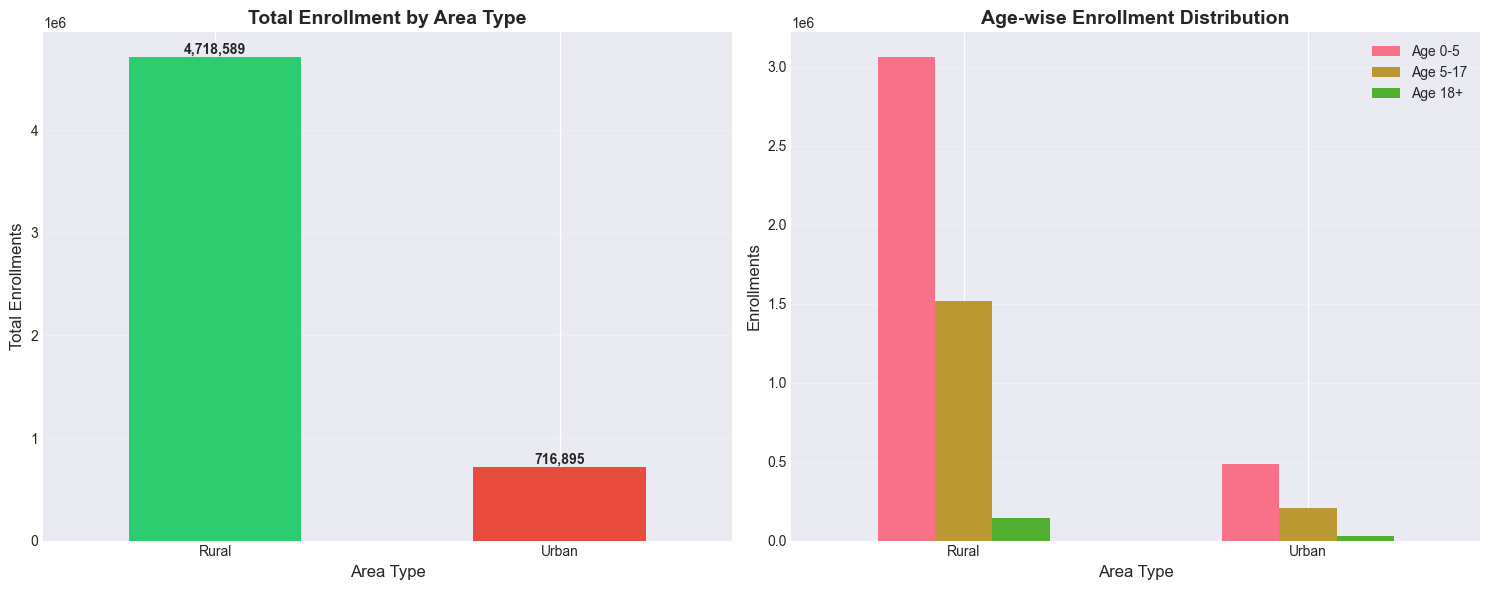

In [11]:
# Visualize enrollment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Total enrollment by area
enrollment_by_area['total'].plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Total Enrollment by Area Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Area Type', fontsize=12)
axes[0].set_ylabel('Total Enrollments', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(enrollment_by_area['total']):
    axes[0].text(i, v, f'{int(v):,}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Age-wise distribution
enrollment_by_area[['age_0_5', 'age_5_17', 'age_18_greater']].plot(
    kind='bar', ax=axes[1], stacked=False
)
axes[1].set_title('Age-wise Enrollment Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Area Type', fontsize=12)
axes[1].set_ylabel('Enrollments', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(['Age 0-5', 'Age 5-17', 'Age 18+'], loc='best')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. State-wise Rural vs Urban Analysis

In [12]:
# State-wise enrollment by area type
print("=" * 80)
print("STATE-WISE ENROLLMENT ANALYSIS")
print("=" * 80)

# Create pivot table: states vs area type
state_area_pivot = df_enroll_clean.groupby(['state', 'area_type'])['age_18_greater'].sum().unstack(fill_value=0)
state_area_pivot['total'] = state_area_pivot.sum(axis=1)
state_area_pivot = state_area_pivot.sort_values('total', ascending=False)

print("\nTop 15 States by Total Enrollment:")
display(state_area_pivot.head(15))

# Calculate rural percentage for each state
if 'Rural' in state_area_pivot.columns and 'Urban' in state_area_pivot.columns:
    state_area_pivot['rural_pct'] = (state_area_pivot['Rural'] / state_area_pivot['total'] * 100)
    state_area_pivot['urban_pct'] = (state_area_pivot['Urban'] / state_area_pivot['total'] * 100)
    
    print("\nTop 10 States by Rural Enrollment Percentage:")
    display(state_area_pivot[['Rural', 'Urban', 'total', 'rural_pct']].sort_values('rural_pct', ascending=False).head(10))
    
    print("\nTop 10 States by Urban Enrollment Percentage:")
    display(state_area_pivot[['Rural', 'Urban', 'total', 'urban_pct']].sort_values('urban_pct', ascending=False).head(10))

STATE-WISE ENROLLMENT ANALYSIS

Top 15 States by Total Enrollment:


area_type,Rural,Urban,total
state,,,
meghalaya,35287,0,35287
assam,22877,0,22877
uttar pradesh,14854,3048,17902
gujarat,13777,2559,16336
bihar,11243,665,11908
karnataka,1942,8168,10110
madhya pradesh,8866,733,9599
west bengal,6863,1647,8510
maharashtra,5724,2485,8209



Top 10 States by Rural Enrollment Percentage:


area_type,Rural,Urban,total,rural_pct
state,,,,
meghalaya,35287,0,35287,100.00
pondicherry,44,0,44,100.00
sikkim,106,0,106,100.00
arunachal pradesh,151,0,151,100.00
goa,163,0,163,100.00
himachal pradesh,186,0,186,100.00
tripura,255,0,255,100.00
manipur,263,0,263,100.00
uttarakhand,339,0,339,100.00



Top 10 States by Urban Enrollment Percentage:


area_type,Rural,Urban,total,urban_pct
state,,,,
lakshadweep,0,1,1,100.00
delhi,0,3050,3050,100.00
chandigarh,0,36,36,100.00
telangana,185,966,1151,83.93
karnataka,1942,8168,10110,80.79
haryana,350,750,1100,68.18
tamil nadu,863,386,1249,30.90
maharashtra,5724,2485,8209,30.27
punjab,2277,895,3172,28.22


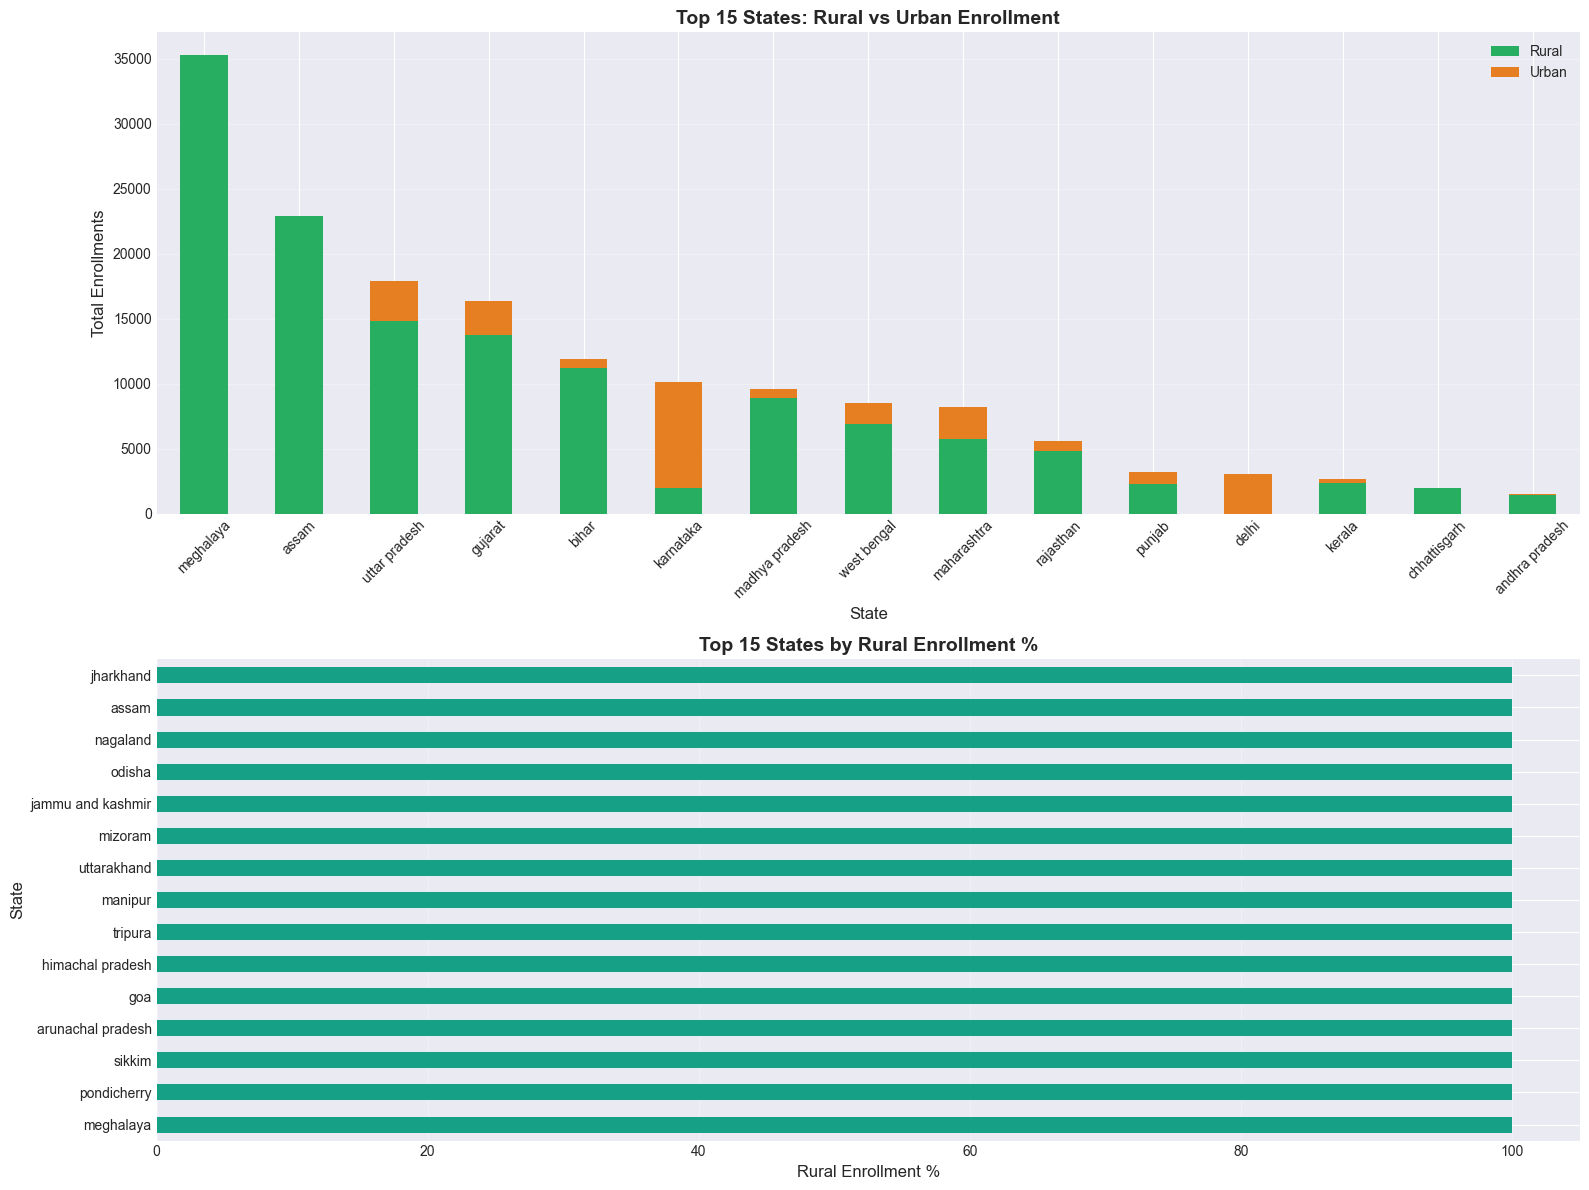

In [13]:
# Visualize top states
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Top 15 states by total enrollment
top_15_states = state_area_pivot.head(15)
if 'Rural' in top_15_states.columns and 'Urban' in top_15_states.columns:
    top_15_states[['Rural', 'Urban']].plot(kind='bar', ax=axes[0], stacked=True, color=['#27ae60', '#e67e22'])
else:
    top_15_states[['total']].plot(kind='bar', ax=axes[0])

axes[0].set_title('Top 15 States: Rural vs Urban Enrollment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('State', fontsize=12)
axes[0].set_ylabel('Total Enrollments', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['Rural', 'Urban'], loc='best')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Rural percentage by state (top 15)
if 'rural_pct' in state_area_pivot.columns:
    top_rural_pct = state_area_pivot.sort_values('rural_pct', ascending=False).head(15)
    top_rural_pct['rural_pct'].plot(kind='barh', ax=axes[1], color='#16a085')
    axes[1].set_title('Top 15 States by Rural Enrollment %', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Rural Enrollment %', fontsize=12)
    axes[1].set_ylabel('State', fontsize=12)
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Demographic Data Analysis

In [14]:
# Analyze demographic data
print("=" * 80)
print("DEMOGRAPHIC ANALYSIS BY AREA TYPE")
print("=" * 80)

df_demo_clean = df_demographic[df_demographic['area_type'] != 'Unknown'].copy()

# Aggregate demographic data
demo_by_area = df_demo_clean.groupby('area_type')[['demo_age_5_17', 'demo_age_17_']].sum()
demo_by_area['total'] = demo_by_area.sum(axis=1)

print("\nDemographic Enrollment by Area Type:")
display(demo_by_area)

# Calculate percentages
demo_pct = (demo_by_area.T / demo_by_area['total'] * 100).T
print("\nAge Distribution (%) within each area:")
display(demo_pct[['demo_age_5_17', 'demo_age_17_']])

DEMOGRAPHIC ANALYSIS BY AREA TYPE

Demographic Enrollment by Area Type:


,demo_age_5_17,demo_age_17_,total
area_type,,,
Rural,4073063,37652996,41726059
Urban,790361,6778754,7569115



Age Distribution (%) within each area:


,demo_age_5_17,demo_age_17_
area_type,,
Rural,9.76,90.24
Urban,10.44,89.56


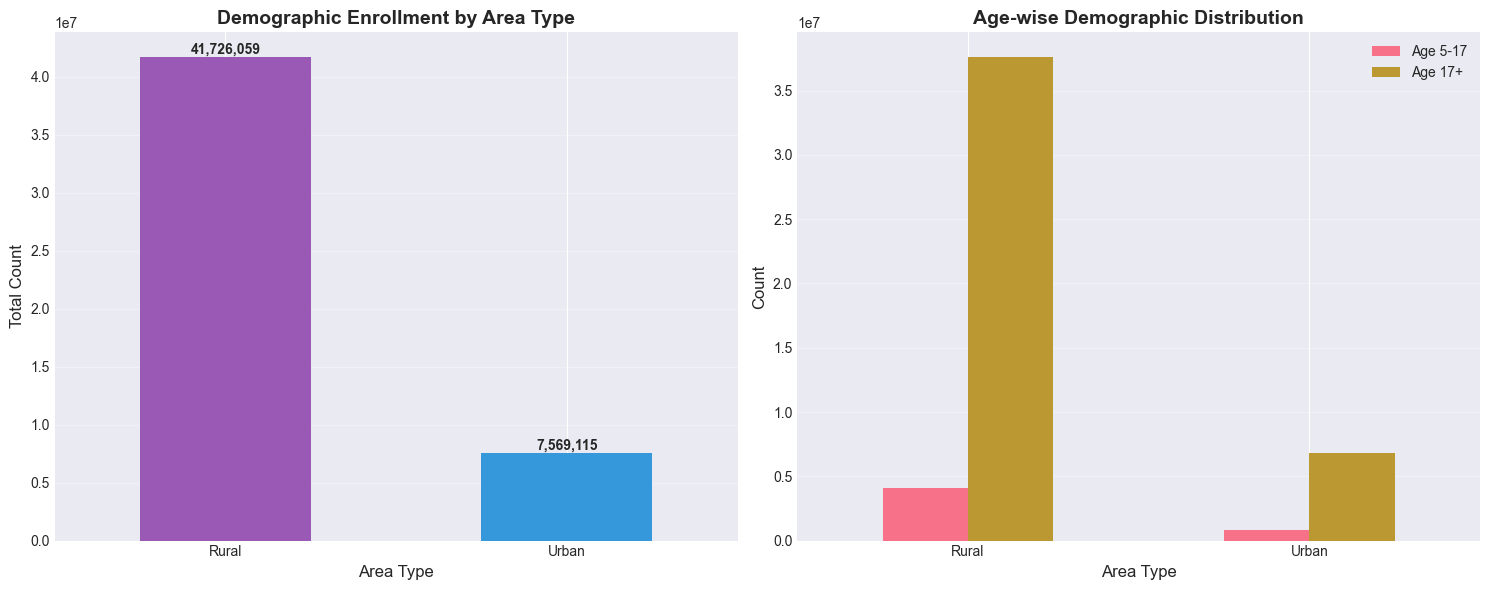

In [15]:
# Visualize demographic distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Total demographic enrollment
demo_by_area['total'].plot(kind='bar', ax=axes[0], color=['#9b59b6', '#3498db'])
axes[0].set_title('Demographic Enrollment by Area Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Area Type', fontsize=12)
axes[0].set_ylabel('Total Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(demo_by_area['total']):
    axes[0].text(i, v, f'{int(v):,}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Age-wise distribution
demo_by_area[['demo_age_5_17', 'demo_age_17_']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Age-wise Demographic Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Area Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(['Age 5-17', 'Age 17+'], loc='best')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Biometric Authentication Analysis

In [16]:
# Analyze biometric data
print("=" * 80)
print("BIOMETRIC AUTHENTICATION ANALYSIS BY AREA TYPE")
print("=" * 80)

df_bio_clean = df_biometric[df_biometric['area_type'] != 'Unknown'].copy()

# Aggregate biometric data
bio_by_area = df_bio_clean.groupby('area_type')[['bio_age_5_17', 'bio_age_17_']].sum()
bio_by_area['total'] = bio_by_area.sum(axis=1)

print("\nBiometric Authentication by Area Type:")
display(bio_by_area)

# Calculate percentages
bio_pct = (bio_by_area.T / bio_by_area['total'] * 100).T
print("\nAge Distribution (%) within each area:")
display(bio_pct[['bio_age_5_17', 'bio_age_17_']])

# Compare biometric to demographic (success rate proxy)
if 'Rural' in bio_by_area.index and 'Rural' in demo_by_area.index:
    print("\n" + "="*60)
    print("BIOMETRIC TO DEMOGRAPHIC RATIO (Proxy for Success Rate)")
    print("="*60)
    
    for area in ['Rural', 'Urban']:
        if area in bio_by_area.index and area in demo_by_area.index:
            ratio = bio_by_area.loc[area, 'total'] / demo_by_area.loc[area, 'total']
            print(f"\n{area} Area:")
            print(f"  Biometric: {bio_by_area.loc[area, 'total']:,}")
            print(f"  Demographic: {demo_by_area.loc[area, 'total']:,}")
            print(f"  Ratio: {ratio:.2%}")

BIOMETRIC AUTHENTICATION ANALYSIS BY AREA TYPE

Biometric Authentication by Area Type:


,bio_age_5_17,bio_age_17_,total
area_type,,,
Rural,24617675,25092252,49709927
Urban,3417827,4422113,7839940



Age Distribution (%) within each area:


,bio_age_5_17,bio_age_17_
area_type,,
Rural,49.52,50.48
Urban,43.60,56.40



BIOMETRIC TO DEMOGRAPHIC RATIO (Proxy for Success Rate)

Rural Area:
  Biometric: 49,709,927
  Demographic: 41,726,059
  Ratio: 119.13%

Urban Area:
  Biometric: 7,839,940
  Demographic: 7,569,115
  Ratio: 103.58%


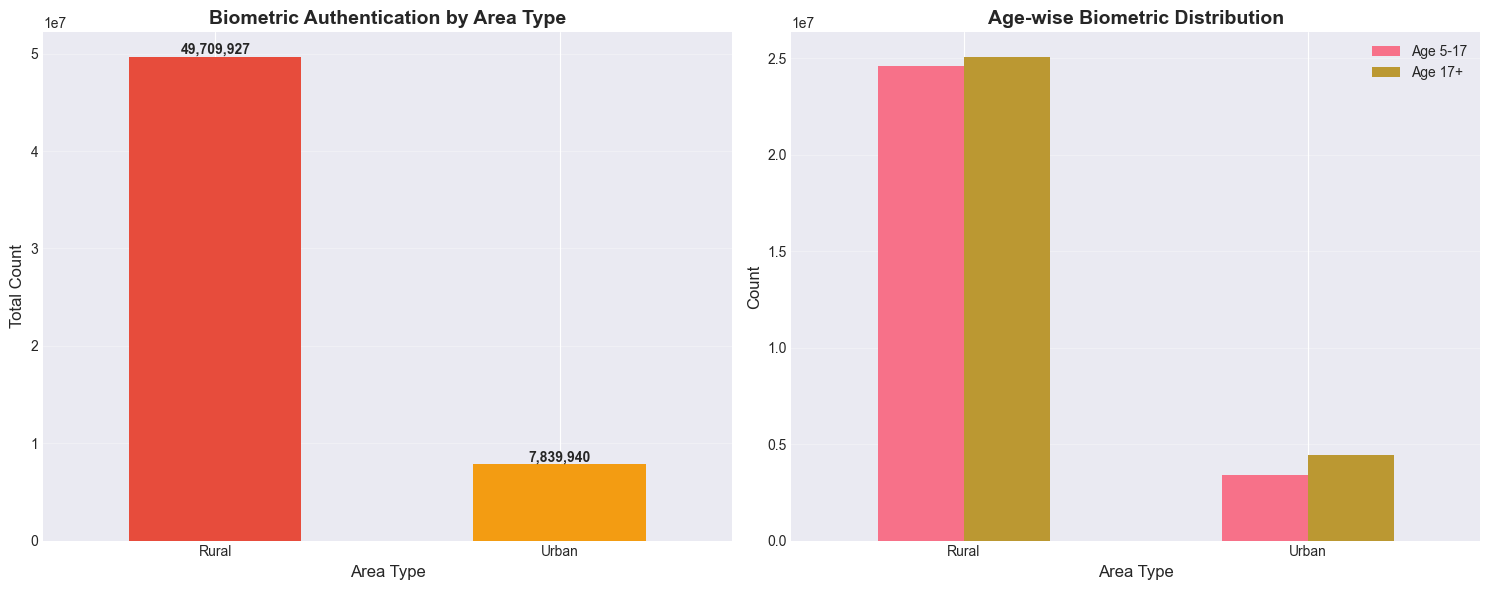

In [17]:
# Visualize biometric distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Total biometric count
bio_by_area['total'].plot(kind='bar', ax=axes[0], color=['#e74c3c', '#f39c12'])
axes[0].set_title('Biometric Authentication by Area Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Area Type', fontsize=12)
axes[0].set_ylabel('Total Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(bio_by_area['total']):
    axes[0].text(i, v, f'{int(v):,}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Age-wise distribution
bio_by_area[['bio_age_5_17', 'bio_age_17_']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Age-wise Biometric Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Area Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(['Age 5-17', 'Age 17+'], loc='best')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Digital Divide Analysis

In [18]:
# Calculate digital divide metrics
print("=" * 80)
print("DIGITAL DIVIDE INDICATORS")
print("=" * 80)

# 1. Urban vs Rural enrollment disparity
if 'Rural' in enrollment_by_area.index and 'Urban' in enrollment_by_area.index:
    total_enrollments = enrollment_by_area['total'].sum()
    rural_share = enrollment_by_area.loc['Rural', 'total'] / total_enrollments * 100
    urban_share = enrollment_by_area.loc['Urban', 'total'] / total_enrollments * 100
    
    print("\n1. ENROLLMENT SHARE")
    print(f"   Rural share: {rural_share:.2f}%")
    print(f"   Urban share: {urban_share:.2f}%")
    print(f"   Disparity ratio: {rural_share/urban_share:.2f}:1")

# 2. State-wise digital divide
if 'rural_pct' in state_area_pivot.columns:
    print("\n2. STATE-WISE DIVIDE")
    print(f"   Most rural state: {state_area_pivot['rural_pct'].idxmax()} ({state_area_pivot['rural_pct'].max():.2f}%)")
    print(f"   Most urban state: {state_area_pivot['urban_pct'].idxmax()} ({state_area_pivot['urban_pct'].max():.2f}%)")
    print(f"   Average rural enrollment: {state_area_pivot['rural_pct'].mean():.2f}%")

# 3. District-level insights (top underserved)
print("\n3. DISTRICT-LEVEL INSIGHTS")
district_enrollment = df_enroll_clean.groupby(['state', 'district', 'area_type'])['age_18_greater'].sum().reset_index()
rural_districts = district_enrollment[district_enrollment['area_type'] == 'Rural'].sort_values('age_18_greater', ascending=True)
print("\n   Top 10 Underserved Rural Districts (lowest enrollment):")
display(rural_districts.head(10))

# 4. Age group disparities
print("\n4. AGE GROUP DISPARITIES")
if 'Rural' in enrollment_by_area.index and 'Urban' in enrollment_by_area.index:
    for age_col in ['age_0_5', 'age_5_17', 'age_18_greater']:
        rural_count = enrollment_by_area.loc['Rural', age_col]
        urban_count = enrollment_by_area.loc['Urban', age_col]
        ratio = rural_count / urban_count if urban_count > 0 else 0
        print(f"   {age_col}: Rural/Urban ratio = {ratio:.2f}")

DIGITAL DIVIDE INDICATORS

1. ENROLLMENT SHARE
   Rural share: 86.81%
   Urban share: 13.19%
   Disparity ratio: 6.58:1

2. STATE-WISE DIVIDE
   Most rural state: meghalaya (100.00%)
   Most urban state: delhi (100.00%)
   Average rural enrollment: 79.50%

3. DISTRICT-LEVEL INSIGHTS

   Top 10 Underserved Rural Districts (lowest enrollment):


,state,district,area_type,age_18_greater
0,andaman and nicobar islands,Nicobar,Rural,0
351,jharkhand,Seraikela-kharsawan,Rural,0
366,karnataka,Bijapur(KAR),Rural,0
393,karnataka,yadgir,Rural,0
475,maharashtra,Ahmed Nagar,Rural,0
956,west bengal,hooghly,Rural,0
501,maharashtra,Mumbai,Rural,0
510,maharashtra,Nashik,Rural,0
519,maharashtra,Raigarh(MH),Rural,0
537,manipur,Pherzawl,Rural,0



4. AGE GROUP DISPARITIES
   age_0_5: Rural/Urban ratio = 6.33
   age_5_17: Rural/Urban ratio = 7.32
   age_18_greater: Rural/Urban ratio = 5.34


## 11. Time-Series Analysis (if date data is available)

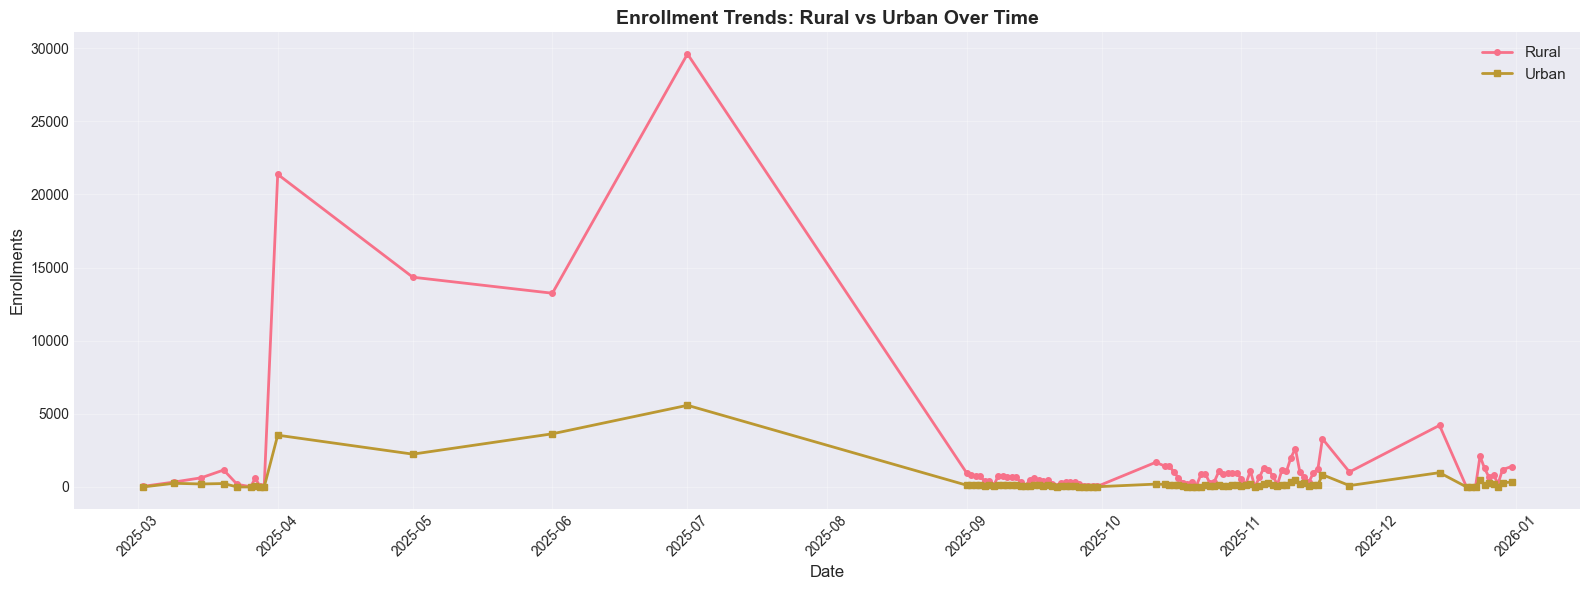

✓ Time series analysis complete


In [19]:
# Convert date columns to datetime
try:
    df_enroll_clean['date'] = pd.to_datetime(df_enroll_clean['date'], format='%d-%m-%Y', errors='coerce')
    
    # Group by date and area type
    time_series = df_enroll_clean.groupby(['date', 'area_type'])['age_18_greater'].sum().unstack(fill_value=0)
    
    # Plot time series
    plt.figure(figsize=(16, 6))
    
    if 'Rural' in time_series.columns:
        plt.plot(time_series.index, time_series['Rural'], label='Rural', linewidth=2, marker='o', markersize=4)
    if 'Urban' in time_series.columns:
        plt.plot(time_series.index, time_series['Urban'], label='Urban', linewidth=2, marker='s', markersize=4)
    
    plt.title('Enrollment Trends: Rural vs Urban Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Enrollments', fontsize=12)
    plt.legend(loc='best', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("✓ Time series analysis complete")
except Exception as e:
    print(f"Time series analysis skipped: {e}")

## 12. Summary Report Generation

In [20]:
# Generate comprehensive summary report
report = []
report.append("=" * 80)
report.append("RURAL VS URBAN ADOPTION ANALYSIS - SUMMARY REPORT")
report.append("=" * 80)
report.append(f"\nReport Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report.append("\n" + "="*80)

# Dataset summary
report.append("\n1. DATASET OVERVIEW")
report.append(f"   - Demographic records: {len(df_demographic):,}")
report.append(f"   - Biometric records: {len(df_biometric):,}")
report.append(f"   - Enrollment records: {len(df_enrollment):,}")

# Classification results
report.append("\n2. AREA CLASSIFICATION")
for area in ['Rural', 'Urban', 'Unknown']:
    if area in df_enroll_clean['area_type'].value_counts():
        count = df_enroll_clean['area_type'].value_counts()[area]
        pct = count / len(df_enroll_clean) * 100
        report.append(f"   - {area}: {count:,} records ({pct:.2f}%)")

# Enrollment statistics
report.append("\n3. ENROLLMENT STATISTICS")
if 'Rural' in enrollment_by_area.index and 'Urban' in enrollment_by_area.index:
    report.append(f"   Rural enrollments: {enrollment_by_area.loc['Rural', 'total']:,}")
    report.append(f"   Urban enrollments: {enrollment_by_area.loc['Urban', 'total']:,}")
    ratio = enrollment_by_area.loc['Rural', 'total'] / enrollment_by_area.loc['Urban', 'total']
    report.append(f"   Rural/Urban ratio: {ratio:.2f}:1")

# Top states
report.append("\n4. TOP 5 STATES BY ENROLLMENT")
for i, (state, row) in enumerate(state_area_pivot.head(5).iterrows(), 1):
    report.append(f"   {i}. {state}: {row['total']:,} enrollments")

# Digital divide insights
report.append("\n5. KEY INSIGHTS")
if 'rural_pct' in state_area_pivot.columns:
    avg_rural = state_area_pivot['rural_pct'].mean()
    report.append(f"   - Average rural enrollment percentage: {avg_rural:.2f}%")
    report.append(f"   - States with >80% rural enrollment: {len(state_area_pivot[state_area_pivot['rural_pct'] > 80])}")
    report.append(f"   - States with >50% urban enrollment: {len(state_area_pivot[state_area_pivot['urban_pct'] > 50])}")

report.append("\n" + "="*80)
report.append("END OF REPORT")
report.append("=" * 80)

# Print report
report_text = "\n".join(report)
print(report_text)

# Save report to file
with open('RURAL_URBAN_ANALYSIS_REPORT.txt', 'w') as f:
    f.write(report_text)
print("\n✓ Report saved to RURAL_URBAN_ANALYSIS_REPORT.txt")

RURAL VS URBAN ADOPTION ANALYSIS - SUMMARY REPORT

Report Generated: 2026-01-19 23:13:01


1. DATASET OVERVIEW
   - Demographic records: 2,071,687
   - Biometric records: 1,048,575
   - Enrollment records: 1,006,007

2. AREA CLASSIFICATION
   - Rural: 892,880 records (88.75%)
   - Urban: 113,127 records (11.25%)

3. ENROLLMENT STATISTICS
   Rural enrollments: 4,718,589
   Urban enrollments: 716,895
   Rural/Urban ratio: 6.58:1

4. TOP 5 STATES BY ENROLLMENT
   1. meghalaya: 35,287.0 enrollments
   2. assam: 22,877.0 enrollments
   3. uttar pradesh: 17,902.0 enrollments
   4. gujarat: 16,336.0 enrollments
   5. bihar: 11,908.0 enrollments

5. KEY INSIGHTS
   - Average rural enrollment percentage: 79.50%
   - States with >80% rural enrollment: 26
   - States with >50% urban enrollment: 6

END OF REPORT

✓ Report saved to RURAL_URBAN_ANALYSIS_REPORT.txt


## 13. Export Processed Data (Optional)

In [21]:
# Export classified datasets for further analysis
print("Exporting classified datasets...\n")

# Export to CSV
df_enroll_clean.to_csv('enrollment_classified.csv', index=False)
print("✓ enrollment_classified.csv saved")

df_demo_clean.to_csv('demographic_classified.csv', index=False)
print("✓ demographic_classified.csv saved")

df_bio_clean.to_csv('biometric_classified.csv', index=False)
print("✓ biometric_classified.csv saved")

# Export summary statistics
state_area_pivot.to_csv('state_wise_rural_urban_summary.csv')
print("✓ state_wise_rural_urban_summary.csv saved")

print("\n✅ All exports complete!")

Exporting classified datasets...

✓ enrollment_classified.csv saved
✓ demographic_classified.csv saved
✓ biometric_classified.csv saved
✓ state_wise_rural_urban_summary.csv saved

✅ All exports complete!


## Conclusion

This analysis has examined the digital divide between rural and urban areas in Aadhaar enrollment using pincode-based classification. Key findings include:

1. **Enrollment Distribution**: Examined how enrollments are distributed across rural and urban areas
2. **State-wise Patterns**: Identified states with higher rural vs urban enrollment rates
3. **Age Group Analysis**: Analyzed enrollment patterns across different age groups
4. **Biometric Authentication**: Compared biometric authentication rates between areas
5. **Underserved Regions**: Identified districts and regions that need more attention

The results highlight important patterns in digital infrastructure adoption and can inform policy decisions for improving enrollment in underserved areas.